In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### National Survey on Drug Use and Health 2002 to 2014

https://www.icpsr.umich.edu/web/RCMD/search/studies?start=0&sort=score%20desc%2CTITLE_SORT%20asc&CLASSIF_FACET=RCMD.V.&ARCHIVE=RCMD&PUBLISH_STATUS=PUBLISHED&TIMEPERIOD_NEW=%5B2012%20TO%202022%5D&rows=50&q=Behavioral%20Risk%20Factor%20Surveillance%20System

In [4]:
drug = pd.read_stata('34933-0001-Data.dta', convert_categoricals=False) #2012 example

In [5]:
#contain race and sex column

In [6]:
drug.shape

(55268, 3120)

In [7]:
drug

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1275.60,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,2,2,5191.07,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,3,3,419.74,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,...,1,1,2,1,1,2,2,1449.30,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,...,1,1,1,1,1,1,1,15344.29,30012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55263,55264,54947473,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,1,1,1289.36,30032,2
55264,55265,67706608,2,4,4,991,9991,91,91,91,...,9,9,99,9,9,2,1,116.92,30050,2
55265,55266,47284524,2,99,99,991,9991,91,91,91,...,1,1,2,1,1,1,1,1276.95,30018,1
55266,55267,32935928,1,99,99,13,9999,99,1,4,...,1,1,1,1,1,2,2,8072.38,30030,2


In [8]:
relgion_df = drug[['SNRLGSVC','SNRLGIMP','SNRLDCSN','SNRLFRND']]
religion_df = relgion_df.rename({'SNRLGSVC':'Past_12_months','SNRLGIMP':'Important','SNRLDCSN':'Influence','SNRLFRND':'Friends_Share'},axis=1)
religion_df.shape

(55268, 4)

In [23]:
drop_values = [94,97,98,99]

# To see what observations involves answers: 
#"Don't Know", Refused to answer, blank, or Legitimate Skip
religion_df[(religion_df.Past_12_months.isin(drop_values) == False) & 
            (religion_df.Important.isin(drop_values) == False) & 
            (religion_df.Influence.isin(drop_values) == False) & 
            (religion_df.Friends_Share.isin(drop_values) == False)]

,Past_12_months,Important,Influence,Friends_Share
1,2,3,3,2
2,6,4,4,2
3,4,3,3,1
4,2,1,1,1
5,3,3,4,2
...,...,...,...,...
55256,6,4,4,4
55261,3,3,3,2
55262,6,4,4,3
55263,1,3,3,3


In [24]:
religion_df

,Past_12_months,Important,Influence,Friends_Share
0,99,99,99,99
1,2,3,3,2
2,6,4,4,2
3,4,3,3,1
4,2,1,1,1
...,...,...,...,...
55263,1,3,3,3
55264,99,99,99,99
55265,1,97,97,97
55266,4,3,4,3


In [25]:
crime_df = drug[["SNYSTOLE", "YEYSTOLE","SNYSELL", "YEYSELL","DRVDONLY", "TXYRJAIL", 
                 "BOOKED","NOBOOKY2","YUJVDTON","YUJVDTN2","TXYRJLAD","LOCJAIL","ALCJAIL",
                "DRGJAIL"]]
crime_df

,SNYSTOLE,YEYSTOLE,SNYSELL,YEYSELL,DRVDONLY,TXYRJAIL,BOOKED,NOBOOKY2,YUJVDTON,YUJVDTN2,TXYRJLAD,LOCJAIL,ALCJAIL,DRGJAIL
0,99,1,99,1,99,99,2,999,2,999,99,0,0,0
1,1,99,1,99,99,99,2,999,99,999,99,0,0,0
2,1,99,1,99,91,91,2,999,99,999,91,0,0,0
3,1,99,1,99,1,99,2,999,99,999,99,0,0,0
4,1,99,1,99,99,99,2,999,99,999,99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55263,1,99,1,99,91,91,2,999,99,999,91,0,0,0
55264,99,1,99,1,91,91,1,994,2,999,91,0,0,0
55265,1,99,1,99,99,99,2,999,99,999,99,0,0,0
55266,1,99,1,99,2,99,2,999,99,999,99,0,0,0


In [47]:
religion_crime = pd.concat([religion_df, crime_df], axis=1)
religion_crime = religion_crime.rename(
    {"SNYSTOLE": 'Ever_Steal_50', "YEYSTOLE":'Y_Ever_Steal_50',"SNYSELL": 'Sell_Illgal_Drugs',
     "YEYSELL":"Y_Sell_Illgal_Drugs","DRVDONLY":'Drunk_Drive',"TXYRJAIL":"Jail_Treatment_Past_12",
     "TXYRJLAD":"Alc_Drug_Treatment_Ever","LOCJAIL":"Drug_or_Alc_Past_12","ALCJAIL":"Alc_Treatment_Past_12", 
     "DRGJAIL":"Drug_Treatment_Past_12","BOOKED":"Ever_Booked_Arrested","NOBOOKY2":"No_times_Arrested_Past_12",
     "YUJVDTON":"Y_Arrested_Past_12", "YUJVDTN2":"Y_No_Nights_Jail"},axis=1)
religion_crime.shape

(55268, 18)

In [48]:
religion_crime

,Past_12_months,Important,Influence,Friends_Share,Ever_Steal_50,Y_Ever_Steal_50,Sell_Illgal_Drugs,Y_Sell_Illgal_Drugs,Drunk_Drive,Jail_Treatment_Past_12,Ever_Booked_Arrested,No_times_Arrested_Past_12,Y_Arrested_Past_12,Y_No_Nights_Jail,Alc_Drug_Treatment_Ever,Drug_or_Alc_Past_12,Alc_Treatment_Past_12,Drug_Treatment_Past_12
0,99,99,99,99,99,1,99,1,99,99,2,999,2,999,99,0,0,0
1,2,3,3,2,1,99,1,99,99,99,2,999,99,999,99,0,0,0
2,6,4,4,2,1,99,1,99,91,91,2,999,99,999,91,0,0,0
3,4,3,3,1,1,99,1,99,1,99,2,999,99,999,99,0,0,0
4,2,1,1,1,1,99,1,99,99,99,2,999,99,999,99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55263,1,3,3,3,1,99,1,99,91,91,2,999,99,999,91,0,0,0
55264,99,99,99,99,99,1,99,1,91,91,1,994,2,999,91,0,0,0
55265,1,97,97,97,1,99,1,99,99,99,2,999,99,999,99,0,0,0
55266,4,3,4,3,1,99,1,99,2,99,2,999,99,999,99,0,0,0


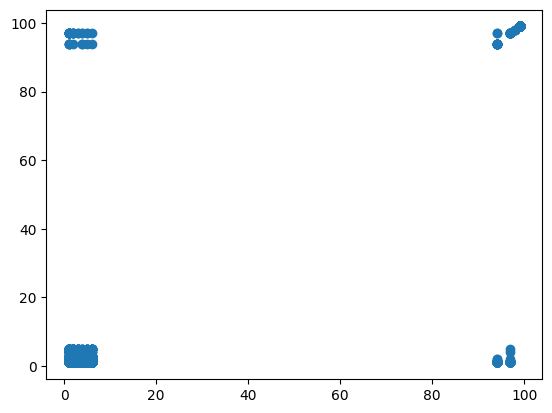

In [57]:
plt.scatter(religion_crime["Past_12_months"],religion_crime["Ever_Steal_50"])

In [58]:
# PAST 12 MOS, HOW MANY RELIG. SERVICES
# 1 = 0 times; 2 = 1~2 times; 3 = 3~5 times; 4 = 6~24 times; 5 = 25~52;
# 6= more than 52 times
religion_crime['Past_12_months'].value_counts()

99    17399
1     15723
4      5016
2      4524
5      4356
6      4278
3      3753
94      108
97      107
98        4
Name: Past_12_months, dtype: int64

In [59]:
#1 = 0 times; 2 = 1~2 times; 3 = 3~5 times; 4 = 6~9 times; 5 = 10 or more
religion_crime['Ever_Steal_50'].value_counts()

1     37126
99    17399
2       424
3        99
5        92
97       56
4        46
94       22
98        4
Name: Ever_Steal_50, dtype: int64

In [61]:
religion_crime.corr()

,Past_12_months,Important,Influence,Friends_Share,Ever_Steal_50,Y_Ever_Steal_50,Sell_Illgal_Drugs,Y_Sell_Illgal_Drugs,Drunk_Drive,Jail_Treatment_Past_12,Ever_Booked_Arrested,No_times_Arrested_Past_12,Y_Arrested_Past_12,Y_No_Nights_Jail,Alc_Drug_Treatment_Ever,Drug_or_Alc_Past_12,Alc_Treatment_Past_12,Drug_Treatment_Past_12
Past_12_months,1.000000,0.979256,0.981106,0.979664,0.991390,-0.988511,0.990006,-0.988972,0.042486,-0.103417,0.024967,0.193508,-0.987350,-0.085988,-0.395602,-0.015614,-0.014270,-0.008828
Important,0.979256,1.000000,0.989723,0.983766,0.980795,-0.977804,0.979292,-0.978260,0.039355,-0.102721,0.026117,0.186548,-0.976656,-0.085056,-0.390042,-0.016741,-0.015500,-0.009143
Influence,0.981106,0.989723,1.000000,0.988611,0.982027,-0.979341,0.980820,-0.979798,0.040725,-0.102795,0.027657,0.188005,-0.978192,-0.085190,-0.390602,-0.017458,-0.016415,-0.010177
Friends_Share,0.979664,0.983766,0.988611,1.000000,0.979845,-0.977395,0.978638,-0.977851,0.039842,-0.104591,0.029058,0.188084,-0.976248,-0.085021,-0.391725,-0.015766,-0.014323,-0.008095
Ever_Steal_50,0.991390,0.980795,0.982027,0.979845,1.000000,-0.994283,0.997472,-0.994746,0.035125,-0.104046,0.019905,0.187762,-0.993115,-0.086490,-0.393269,-0.016521,-0.015746,-0.009391
Y_Ever_Steal_50,-0.988511,-0.977804,-0.979341,-0.977395,-0.994283,1.000000,-0.993188,0.998805,-0.039150,0.102603,-0.007977,-0.190793,0.995264,0.083845,0.394500,0.016746,0.015866,0.009721
Sell_Illgal_Drugs,0.990006,0.979292,0.980820,0.978638,0.997472,-0.993188,1.000000,-0.993651,0.031731,-0.104639,0.019081,0.186253,-0.992022,-0.086394,-0.392652,-0.016187,-0.015350,-0.009219
Y_Sell_Illgal_Drugs,-0.988972,-0.978260,-0.979798,-0.977851,-0.994746,0.998805,-0.993651,1.000000,-0.039354,0.102371,-0.009421,-0.190733,0.995576,0.083853,0.394360,0.016833,0.015890,0.009836
Drunk_Drive,0.042486,0.039355,0.040725,0.039842,0.035125,-0.039150,0.031731,-0.039354,1.000000,0.072346,0.026328,0.197150,-0.038121,0.043389,-0.175879,-0.050675,-0.041316,-0.040651
Jail_Treatment_Past_12,-0.103417,-0.102721,-0.102795,-0.104591,-0.104046,0.102603,-0.104639,0.102371,0.072346,1.000000,0.011351,0.130479,0.101255,0.050604,0.288021,-0.331587,-0.265916,-0.261003
